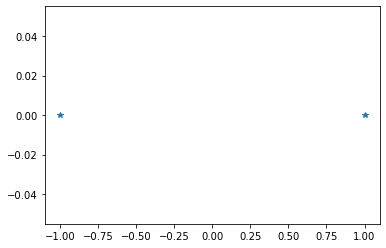

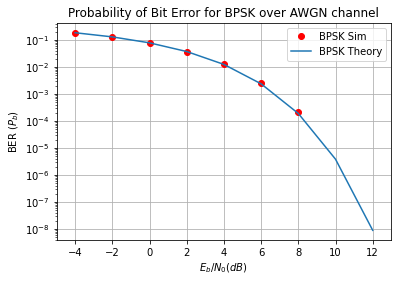

In [4]:
#Eb/N0 Vs BER for BPSK over AWGN (complex baseband model)
# © Author: Mathuranathan Viswanathan (gaussianwaves.com)
import numpy as np #for numerical computing
import matplotlib.pyplot as plt #for plotting functions
from scipy.special import erfc #erfc/Q function

#---------Input Fields------------------------
nSym = 10**5 # Number of symbols to transmit
EbN0dBs = np.arange(start=-4,stop = 13, step = 2) # Eb/N0 range in dB for simulation
BER_sim = np.zeros(len(EbN0dBs)) # simulated Bit error rates

M=2 #Number of points in BPSK constellation
m = np.arange(0,M) #all possible input symbols
A = 1; #amplitude
constellation = A*np.cos(m/M*2*np.pi)  #reference constellation for BPSK

#------------ Transmitter---------------
inputSyms = np.random.randint(low=0, high = M, size=nSym) #Random 1's and 0's as input to BPSK modulator
s = constellation[inputSyms] #modulated symbols

fig, ax1 = plt.subplots(nrows=1,ncols = 1)
ax1.plot(np.real(constellation),np.imag(constellation),'*')

#----------- Channel --------------
#Compute power in modulatedSyms and add AWGN noise for given SNRs
for j,EbN0dB in enumerate(EbN0dBs):
    gamma = 10**(EbN0dB/10) #SNRs to linear scale
    P=sum(abs(s)**2)/len(s) #Actual power in the vector
    N0=P/gamma # Find the noise spectral density
    n = np.sqrt(N0/2)*np.random.standard_normal(s.shape) # computed noise vector
    r = s + n # received signal
    
    #-------------- Receiver ------------
    detectedSyms = (r <= 0).astype(int) #thresolding at value 0
    BER_sim[j] = np.sum(detectedSyms != inputSyms)/nSym #calculate BER

BER_theory = 0.5*erfc(np.sqrt(10**(EbN0dBs/10)))

fig, ax = plt.subplots(nrows=1,ncols = 1)
ax.semilogy(EbN0dBs,BER_sim,color='r',marker='o',linestyle='',label='BPSK Sim')
ax.semilogy(EbN0dBs,BER_theory,marker='',linestyle='-',label='BPSK Theory')
ax.set_xlabel('$E_b/N_0(dB)$');ax.set_ylabel('BER ($P_b$)')
ax.set_title('Probability of Bit Error for BPSK over AWGN channel')
ax.set_xlim(-5,13);ax.grid(True);
ax.legend();plt.show()

In [3]:
BER_sim

array([0.1866, 0.1312, 0.0748, 0.035 , 0.0138, 0.0018, 0.0002, 0.    ,
       0.    ])

In [5]:
BER_sim

array([0.18759, 0.13118, 0.07865, 0.03629, 0.01247, 0.00248, 0.00022,
       0.     , 0.     ])

In [14]:
s_bb = [1,1, 1, -1, -1, 1, -1]
mu = [1 if val == 1 else 0 for val in s_bb]
print(mu)


[1, 1, 1, 0, 0, 1, 0]


In [12]:
import numpy as np
t_s = 
K_J = np.random.randint(low=0, high = 2, size=t_s)
K_J = np.rand[0,1] #should be an array randomly changing between 0 and 1 of dimension = number of time steps
#ξ = 0.8 #energy harvesting efficiency
r = 0.25
τ = 1 #duration of each time slot is 1s
τ_sense = 0.15
τ_switch = [0 if val == 1 else 0.1 for val in K_J]
τ_EH = τ - (r*τ) - (τ_sense + τ_switch)

NameError: name 'append' is not defined

In [15]:
def awgn(signal, desired_snr, signal_power):
    """
    Add AWGN to the input signal to achieve the desired SNR level.
    """
    # Calculate the noise power based on the desired SNR and signal power
    noise_power = signal_power / (10**(desired_snr / 10))
    
    # Generate the noise with the calculated power
    noise = np.random.normal(0, np.sqrt(noise_power), len(signal))
    
    # Add the noise to the original signal
    noisy_signal = signal + noise
    
    return noisy_signal

In [18]:
import numpy as np #for numerical computing
import matplotlib.pyplot as plt #for plotting functions
from scipy.special import erfc #erfc/Q function
# Generate a sine wave signal
t = np.arange(0, 1, 0.001)
signal = np.sin(2 * np.pi * 5 * t)

# Calculate the power of the signal
signal_power = np.mean(signal**2)

EbN0dB = np.arange(start=-4,stop = 11,step = 2)
# Add AWGN to the signal
noisy_signal = awgn(signal, desired_snr=EbN0dB, signal_power=signal_power)

# Plot the original and noisy signals
plt.figure(figsize=(12, 6))
plt.plot(t, signal, label='Original Signal')
plt.plot(t, noisy_signal, label='Signal with AWGN', alpha=0.7)
plt.legend()
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape